In [3]:
#example processing text
#author: jecs89
#date: 02-06-20

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('violence_dataset.csv')

In [5]:
data.head()

,Código,Fecha y hora,Nombre,Género,Edad actual,País,Ciudad,¿Quieres que revisemos la ortografía e ilación de tu relato?,Relato,Número
0,Republicado,4/30/2018 9:52:39,Anónimo,NaN,NaN,México,NaN,NaN,hace tres años un 24 de diciembre estaba toda ...,0
1,Republicado,4/30/2018 11:46:46,Anónimo,NaN,NaN,Colombia,NaN,NaN,"Desde mis 10 años hasta mis trece años,fui abu...",0
2,Republicado,4/30/2018 12:55:02,Anónimo,NaN,NaN,México,NaN,NaN,Hola cuando tenía 12 años fui abusada por mi p...,0
3,Republicado,4/30/2018 13:04:31,Anónimo,NaN,NaN,México,NaN,NaN,"Mi nombre es Marifer tengo 15 años, mi madre e...",0
4,Republicado,4/30/2018 13:45:53,Anónimo,NaN,NaN,Estados Unidos,NaN,NaN,"me llamo iris , tengo 22 años. \nala edad de 1...",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 10 columns):
Código                                                           1101 non-null object
Fecha y hora                                                     1182 non-null object
Nombre                                                           1182 non-null object
Género                                                           496 non-null object
Edad actual                                                      826 non-null float64
País                                                             1182 non-null object
Ciudad                                                           155 non-null object
¿Quieres que revisemos la ortografía e ilación de tu relato?     496 non-null object
Relato                                                           1182 non-null object
Número                                                           1081 non-null object
dtypes: float64(1), object(9)
memory

In [7]:
data['País'] = data['País'].apply(lambda x: str(x))
data['Ciudad'] = data['Ciudad'].apply(lambda x: str(x))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 10 columns):
Código                                                           1101 non-null object
Fecha y hora                                                     1182 non-null object
Nombre                                                           1182 non-null object
Género                                                           496 non-null object
Edad actual                                                      826 non-null float64
País                                                             1182 non-null object
Ciudad                                                           1182 non-null object
¿Quieres que revisemos la ortografía e ilación de tu relato?     496 non-null object
Relato                                                           1182 non-null object
Número                                                           1081 non-null object
dtypes: float64(1), object(9)
memor

In [9]:
import re
from unicodedata import normalize
TEXT_CLEANING_RE = "[^A-Za-z0-9@#]+"

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    
    ##No accents and char different than letters, numbers or /,#,?
    text = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", text), 0, re.I
    )
    text = re.sub(TEXT_CLEANING_RE, ' ', text)
    text = re.sub('\ [0-9]+\ ', ' ', text)
    return text    

round1 = lambda x: clean_text_round1(x)

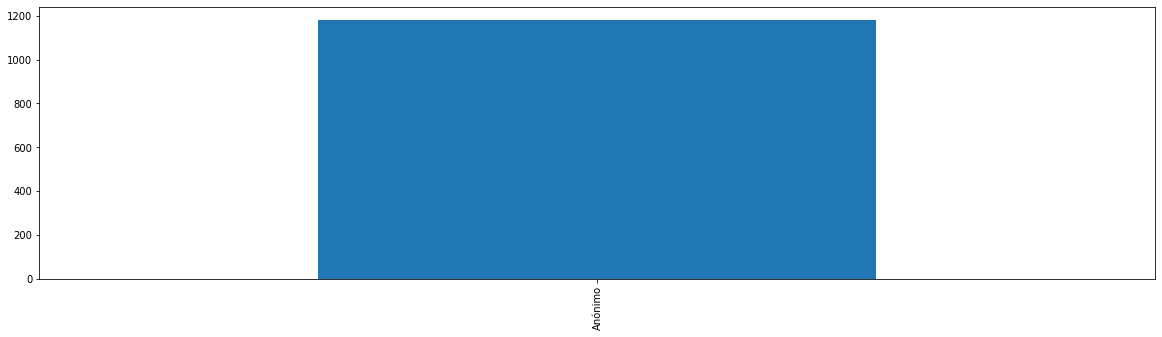

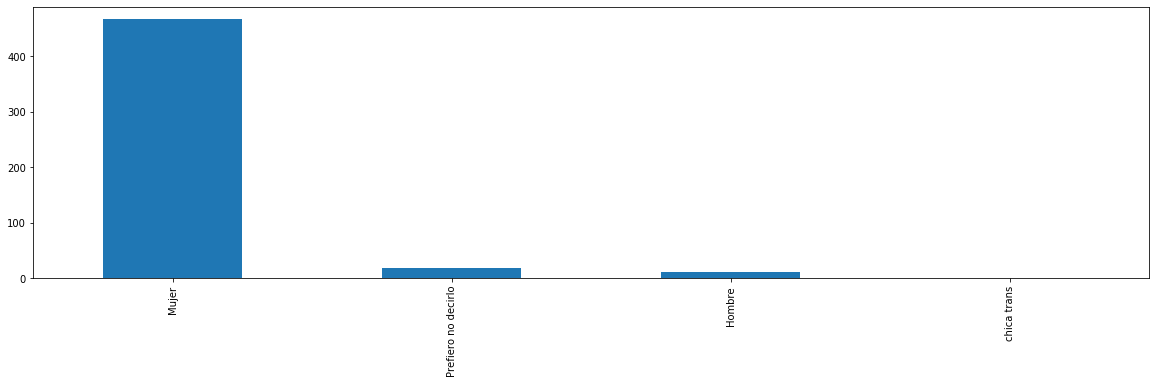

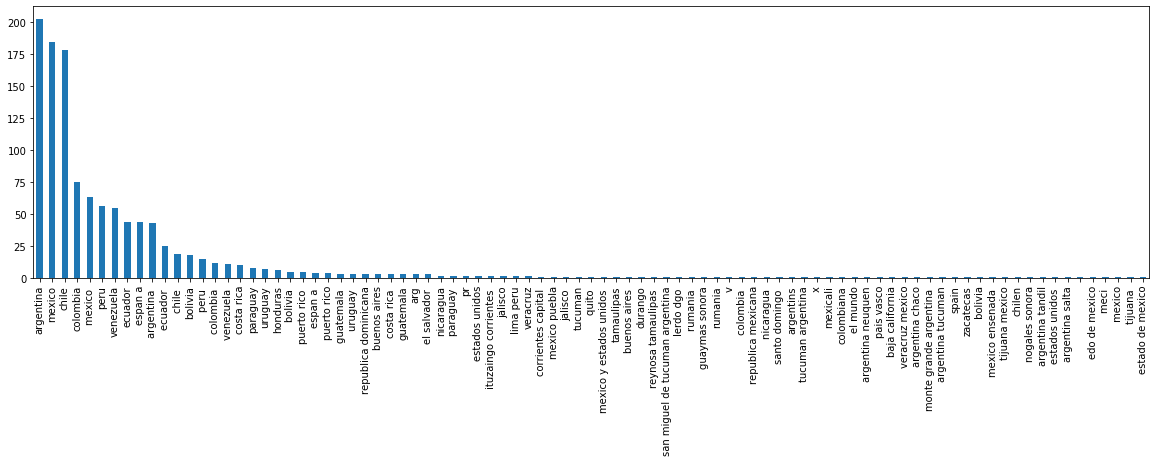

In [10]:
data['País'] = pd.DataFrame(data['País'].apply(clean_text_round1))
data_col = data[['Nombre','Género','País']]
for n in data_col.columns:
    fig = plt.figure(figsize=[20,5])
    data_col[n].value_counts(dropna=True).plot(kind='bar',rot=90)

In [11]:
data_col['País'].value_counts()[:20]

argentina     202
mexico        184
chile         178
colombia       75
mexico         63
peru           56
venezuela      55
ecuador        44
espan a        44
argentina      43
ecuador        25
chile          19
bolivia        18
peru           15
colombia       12
venezuela      11
costa rica     10
paraguay        8
uruguay         7
honduras        6
Name: País, dtype: int64

In [12]:
# 'argentina' == 'argentina'

In [13]:
data.Relato = pd.DataFrame(data.Relato.apply(clean_text_round1))

In [14]:
texto = ' '.join(data.Relato)
tokens = [t for t in texto.split()]

In [15]:
import nltk
freq = nltk.FreqDist(tokens)

tmp_freq = freq.copy()
sp_2 = []
for key,val in tmp_freq.items():
    if len(str(key)) <= 5:
        sp_2.append(key)

for sp in sp_2:
    tmp_freq.pop(str(sp), None)

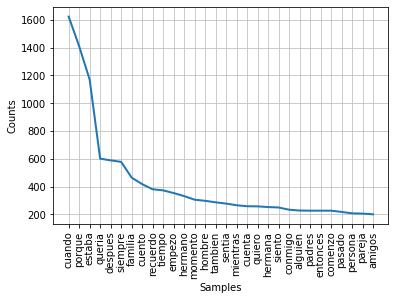

In [16]:
tmp_freq.plot(30, cumulative=False)

In [17]:
type(sp_2)

list

In [18]:
from nltk.corpus import stopwords
stop_words_esp = stopwords.words('spanish')

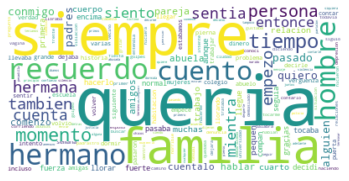

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(stop_words_esp)
stopwords.update(sp_2)
stopwords.update(['tenia','despues'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texto)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()